In [1]:
#pip uninstall scikit-learn --yes
#pip uninstall imblearn --yes
#pip install scikit-learn==1.2.0
#pip install scikit-optimize
#pip install hyperopt==0.2.7
#pip install imblearn
#pip install scikit-plot
#pip install -r requirements.txt

# Pacotes

In [19]:
# Manipulação de dados
import pandas as pd
import numpy as np
from datetime import date
from pytz import timezone

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
plt.style.use('ggplot')

# Machine Learning - Pré-processamento
from sklearn.preprocessing import (
    LabelEncoder, OneHotEncoder, StandardScaler
)
from sklearn.model_selection import (
    train_test_split, cross_val_score, StratifiedKFold, RepeatedStratifiedKFold
)
from sklearn.pipeline import Pipeline

# Machine Learning - Modelos e Métricas
from sklearn.metrics import (
    accuracy_score, f1_score, confusion_matrix, roc_auc_score, 
    recall_score, precision_score, log_loss, average_precision_score,
    roc_curve, precision_recall_curve, balanced_accuracy_score,
    matthews_corrcoef, cohen_kappa_score, brier_score_loss
)

# Modelos e otimização
import xgboost as xgb
from xgboost import XGBClassifier, plot_importance, plot_tree
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK, space_eval
from hyperopt.pyll.base import scope
import shap
from skopt import forest_minimize
import catboost as ctb
from catboost import CatBoostClassifier

# Balanceamento de classes
from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline

# Salvamento e carregamento de modelos
import pickle
import os

# Estatística
from scipy.stats import ks_2samp

# Outras ferramentas
import re

# Verificações de versão
print(f"xgboost: {xgb.__version__}")
print(f"shap: {shap.__version__}")
#print(f"sklearn: {sklearn.__version__}")

import pyarrow
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score


import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score
from hyperopt import fmin, tpe, Trials, STATUS_OK, hp, space_eval
from hyperopt.pyll.base import scope

from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier

from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

import numpy as np
from sklearn.metrics import (
    accuracy_score, confusion_matrix, precision_recall_fscore_support, 
    roc_auc_score, average_precision_score, matthews_corrcoef, log_loss, 
    brier_score_loss, cohen_kappa_score, balanced_accuracy_score,
)
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt

import pyarrow
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score
from hyperopt import fmin, tpe, Trials, STATUS_OK, hp, space_eval
from hyperopt.pyll.base import scope

import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score
from hyperopt import fmin, tpe, Trials, STATUS_OK, hp, space_eval
from hyperopt.pyll.base import scope

from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_validate
from sklearn.preprocessing import OneHotEncoder
import catboost as ctb
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
import numpy as np
import pandas as pd

from hyperopt import STATUS_OK, hp
from sklearn.model_selection import StratifiedKFold, cross_validate
import catboost as ctb
import pandas as pd

from imblearn.over_sampling import SMOTENC
from catboost import CatBoostClassifier

# Bibliotecas padrão e de manipulação de data
from datetime import date
import pandas as pd
import numpy as np
from pytz import timezone

# Visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt

# Machine Learning - pré-processamento e métricas
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, KFold, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, recall_score, precision_score, log_loss, average_precision_score
from sklearn.metrics import roc_curve, precision_recall_curve

# Machine Learning - modelos e otimização
import xgboost as xgb
from xgboost import plot_importance
from xgboost import plot_tree
import sklearn
import shap
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK, space_eval
from skopt import forest_minimize
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

# Salvamento e carregamento de modelos
import pickle
import os

# Outras bibliotecas
import re

plt.style.use('ggplot')
print(xgb.__version__)
print(shap.__version__)
print(sklearn.__version__)
#print(hyperopt.__version__)

from hyperopt import fmin, tpe, Trials, STATUS_OK, hp, space_eval
from hyperopt.pyll.base import scope

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

xgboost: 2.0.2
shap: 0.44.0
2.0.2
0.44.0
1.4.2


# Funções

In [20]:
## Dummies
def get_one_hot_enc(feature_col: pd.Series, enc: preprocessing.OneHotEncoder, column_name: str) -> pd.DataFrame:
    """
    Aplica codificação one-hot a uma coluna específica de um DataFrame.

    Args:
    feature_col (pd.Series): Coluna do DataFrame para ser codificada.
    enc (preprocessing.OneHotEncoder): Instância do OneHotEncoder treinada.
    column_name (str): Nome da coluna a ser codificada.

    Processo:
    1. Cria um DataFrame com a coluna especificada.
    2. Aplica a transformação one-hot usando o encoder fornecido.
    3. Retorna um DataFrame com as colunas codificadas.

    Returns:
    pd.DataFrame: DataFrame com as colunas resultantes da codificação one-hot.
    """
    unseen_df = pd.DataFrame(feature_col, columns=[column_name])
    encoded_vec = enc.transform(unseen_df).toarray()
    columns = enc.get_feature_names_out([column_name])
    encoded_df = pd.DataFrame(encoded_vec, columns=columns)
    return encoded_df


# Função para salvar um modelo em um arquivo pickle
def save_pickle(model, file_name: str):
    """
    Salva um objeto modelo em um arquivo pickle.

    Args:
    model (any): O modelo a ser salvo.
    file_name (str): Nome do arquivo pickle a ser criado.

    Processo:
    1. Abre o arquivo pickle em modo de escrita binária.
    2. Salva o objeto modelo no arquivo pickle.
    """
    with open(file_name, 'wb') as file:
        pickle.dump(model, file)

# Função para carregar um modelo de um arquivo pickle
def load_pickle(file_name: str) -> any:
    """
    Carrega um objeto a partir de um arquivo pickle.

    Args:
    file_name (str): Nome do arquivo pickle a ser carregado.

    Processo:
    1. Abre o arquivo pickle em modo de leitura binária.
    2. Carrega e retorna o objeto contido no arquivo pickle.

    Returns:
    any: Objeto carregado do arquivo pickle.
    """
    with open(file_name, 'rb') as file:
        return pickle.load(file)

# Dataset

In [10]:
file_path = 'df_predicao_ootv_2024.csv'
df = pd.read_csv(file_path)

df = df.drop(columns =[ 'codigo_di', 'codigo_tipo_linha'])

df = df[list(df)]

list_dummies =  colunas_categ = df.drop(columns = 'status_do_voo').select_dtypes(include=['object']).columns.tolist()

# Transformar colunas categóricas em tipo "category"
df[list_dummies] = df[list_dummies].astype("category")

# Seleção das features preditoras (X) e variável-alvo (y)
dt_ax = df.drop(columns=["status_do_voo"])
dt_ay = df[['status_do_voo']]

# Codificação da variável-alvo
label_mapping = {'Pontual': 0, 'Atrasado': 1}
dt_ay = dt_ay['status_do_voo'].map(label_mapping)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267646 entries, 0 to 267645
Data columns (total 31 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   nome_empresas                           267646 non-null  category
 1   descricao_origem                        267646 non-null  category
 2   descricao_destino                       267646 non-null  category
 3   status_do_voo                           267646 non-null  object  
 4   cidade_origem                           267646 non-null  category
 5   uf_origem                               267646 non-null  category
 6   cidade_destino                          267646 non-null  category
 7   uf_destino                              267646 non-null  category
 8   mes_partida                             267646 non-null  category
 9   dia_semana_partida                      267646 non-null  category
 10  dia_mes_partida                 

In [27]:
file_path = 'df_predicao_ootv_2024.csv'
df = pd.read_csv(file_path)

df = df.drop(columns =[ 'codigo_di', 'codigo_tipo_linha','ano'])

df = df[list(df)]

list_dummies =  colunas_categ = df.drop(columns = 'status_do_voo').select_dtypes(include=['object']).columns.tolist()

# Transformar colunas categóricas em tipo "category"
df[list_dummies] = df[list_dummies].astype("category")

# Seleção das features preditoras (X) e variável-alvo (y)
dt_ax = df.drop(columns=["status_do_voo"])
dt_ay = df[['status_do_voo']]

# Codificação da variável-alvo
label_mapping = {'Pontual': 0, 'Atrasado': 1}
dt_ay = dt_ay['status_do_voo'].map(label_mapping)


# Codifica colunas categóricas como inteiros
label_encoders = {}
for col in list_dummies:
    le = LabelEncoder()
    dt_ax[col] = le.fit_transform(dt_ax[col])
    label_encoders[col] = le

# Reverter os valores transformados para o tipo "category" original
def revert_to_category(data, label_encoders, list_dummies):
    for col in list_dummies:
        if col in data.columns:
            le = label_encoders[col]
            data[col] = le.inverse_transform(data[col])
    return data

# Aplicar a reversão em X_smote_a, X_test_calib, X_test
dt_ax = revert_to_category(dt_ax, label_encoders, list_dummies)

# Para garantir que as colunas estão no tipo "category"
dt_ax[list_dummies] = dt_ax[list_dummies].astype("category")

# Converte os nomes das colunas para uma lista de strings
feature_names = list(dt_ax.columns)

# Converte os conjuntos para DMatrix
#dtrain = xgb.DMatrix(X_smote_a, label=y_smote_a, enable_categorical=True, feature_names=feature_names)
dtest = xgb.DMatrix(dt_ax, label=dt_ay, enable_categorical=True, feature_names=feature_names, nthread=-1)

# Modelo

In [28]:
# Carregar o modelo
model_class = load_pickle('modelo/modelo_xgboost_no_smote4.pkl')

In [30]:
print(model_class)

# Predição do modelo com dados OOT

## Analise do Resultado

In [31]:
dt_ay.describe()

count    301648.000000
mean          0.155933
std           0.362793
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: status_do_voo, dtype: float64

In [32]:
X_test = dt_ax 
y_test = dt_ay

In [33]:
import numpy as np
from sklearn.metrics import (
    accuracy_score, confusion_matrix, precision_score, recall_score,
    f1_score, roc_auc_score, balanced_accuracy_score, average_precision_score,
    log_loss, brier_score_loss, cohen_kappa_score, matthews_corrcoef
)

# Garantir que y_test e y_pred_proba sejam arrays NumPy
y_test_np = np.array(y_test)  # Converte y_test para NumPy se necessário
y_pred_proba = model_class.predict(dtest)  # Previsões no formato de probabilidades da classe positiva

# Prever as classes com base no limiar de 0.5
y_pred = (y_pred_proba >= 0.485).astype(int)

# Matriz de confusão e cálculos básicos
cm = confusion_matrix(y_test_np, y_pred)
TN, FP, FN, TP = cm.ravel()
accuracy = accuracy_score(y_test_np, y_pred)
sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = sensitivity
f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
balanced_acc = balanced_accuracy_score(y_test_np, y_pred)
fpr = FP / (FP + TN) if (FP + TN) > 0 else 0
fnr = FN / (FN + TP) if (FN + TP) > 0 else 0

# Métricas baseadas em probabilidades
prauc = average_precision_score(y_test_np, y_pred_proba)
auc = roc_auc_score(y_test_np, y_pred_proba)
gini = 2 * auc - 1
mcc = matthews_corrcoef(y_test_np, y_pred)
log_loss_value = log_loss(y_test_np, y_pred_proba)
brier_score = brier_score_loss(y_test_np, y_pred_proba)
kappa = cohen_kappa_score(y_test_np, y_pred)

# Geometric Mean (G-Mean)
g_mean = np.sqrt(sensitivity * specificity)

# Exibir as métricas
print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1-Score: {f1:.3f}')
print(f'PRAUC: {prauc:.3f}')
print(f'AUC: {auc:.3f}')
print(f'Gini Coefficient: {gini:.3f}')
print(f'MCC: {mcc:.3f}')
print(f'Log Loss: {log_loss_value:.3f}')
print(f'Brier Score: {brier_score:.3f}')
print(f'Cohen\'s Kappa: {kappa:.3f}')
print(f'Balanced Accuracy: {balanced_acc:.3f}')
print(f'Specificity: {specificity:.3f}')
print(f'False Positive Rate (FPR): {fpr:.3f}')
print(f'False Negative Rate (FNR): {fnr:.3f}')
print(f'Geometric Mean (G-Mean): {g_mean:.3f}')


[19:26:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"



Accuracy: 0.624
Precision: 0.222
Recall: 0.565
F1-Score: 0.319
PRAUC: 0.257
AUC: 0.641
Gini Coefficient: 0.283
MCC: 0.149
Log Loss: 0.627
Brier Score: 0.219
Cohen's Kappa: 0.123
Balanced Accuracy: 0.600
Specificity: 0.635
False Positive Rate (FPR): 0.365
False Negative Rate (FNR): 0.435
Geometric Mean (G-Mean): 0.599


In [20]:
import numpy as np
from sklearn.metrics import (
    accuracy_score, confusion_matrix, precision_score, recall_score,
    f1_score, roc_auc_score, balanced_accuracy_score, average_precision_score,
    log_loss, brier_score_loss, cohen_kappa_score, matthews_corrcoef
)

# Garantir que y_test e y_pred_proba sejam arrays NumPy
y_test_np = np.array(y_test)  # Converte y_test para NumPy se necessário
y_pred_proba = model_class.predict(dtest)  # Previsões no formato de probabilidades da classe positiva

# Prever as classes com base no limiar de 0.5
y_pred = (y_pred_proba >= 0.485).astype(int)

# Matriz de confusão e cálculos básicos
cm = confusion_matrix(y_test_np, y_pred)
TN, FP, FN, TP = cm.ravel()
accuracy = accuracy_score(y_test_np, y_pred)
sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = sensitivity
f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
balanced_acc = balanced_accuracy_score(y_test_np, y_pred)
fpr = FP / (FP + TN) if (FP + TN) > 0 else 0
fnr = FN / (FN + TP) if (FN + TP) > 0 else 0

# Métricas baseadas em probabilidades
prauc = average_precision_score(y_test_np, y_pred_proba)
auc = roc_auc_score(y_test_np, y_pred_proba)
gini = 2 * auc - 1
mcc = matthews_corrcoef(y_test_np, y_pred)
log_loss_value = log_loss(y_test_np, y_pred_proba)
brier_score = brier_score_loss(y_test_np, y_pred_proba)
kappa = cohen_kappa_score(y_test_np, y_pred)

# Geometric Mean (G-Mean)
g_mean = np.sqrt(sensitivity * specificity)

# Exibir as métricas
print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1-Score: {f1:.3f}')
print(f'PRAUC: {prauc:.3f}')
print(f'AUC: {auc:.3f}')
print(f'Gini Coefficient: {gini:.3f}')
print(f'MCC: {mcc:.3f}')
print(f'Log Loss: {log_loss_value:.3f}')
print(f'Brier Score: {brier_score:.3f}')
print(f'Cohen\'s Kappa: {kappa:.3f}')
print(f'Balanced Accuracy: {balanced_acc:.3f}')
print(f'Specificity: {specificity:.3f}')
print(f'False Positive Rate (FPR): {fpr:.3f}')
print(f'False Negative Rate (FNR): {fnr:.3f}')
print(f'Geometric Mean (G-Mean): {g_mean:.3f}')


Accuracy: 0.617
Precision: 0.188
Recall: 0.495
F1-Score: 0.272
PRAUC: 0.190
AUC: 0.595
Gini Coefficient: 0.190
MCC: 0.096
Log Loss: 0.638
Brier Score: 0.224
Cohen's Kappa: 0.079
Balanced Accuracy: 0.566
Specificity: 0.637
False Positive Rate (FPR): 0.363
False Negative Rate (FNR): 0.505
Geometric Mean (G-Mean): 0.562


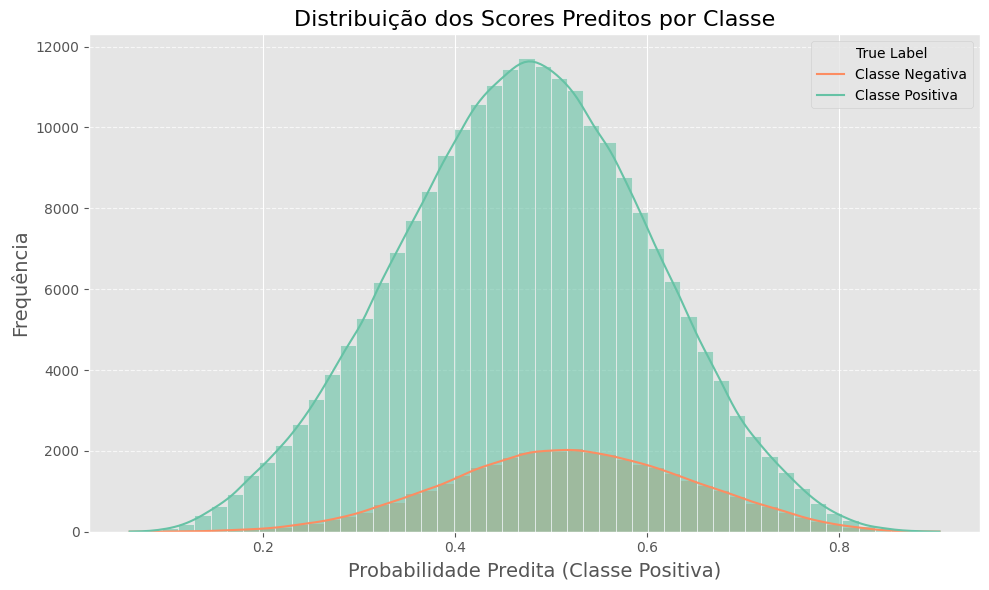

In [38]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Garantir que os dados de teste e as probabilidades preditas sejam arrays NumPy
# Supomos que y_test_np e y_pred_proba já estão definidos conforme descrito

# Criação de um DataFrame para facilitar a visualização
import pandas as pd

data = pd.DataFrame({
    'True Label': y_test_np,
    'Predicted Probability': y_pred_proba
})

# Plotando a distribuição dos scores preditos
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Predicted Probability', hue='True Label', kde=True, bins=50, palette='Set2', alpha=0.6)
plt.title('Distribuição dos Scores Preditos por Classe', fontsize=16)
plt.xlabel('Probabilidade Predita (Classe Positiva)', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.legend(title='True Label', labels=['Classe Negativa', 'Classe Positiva'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Feature Importance

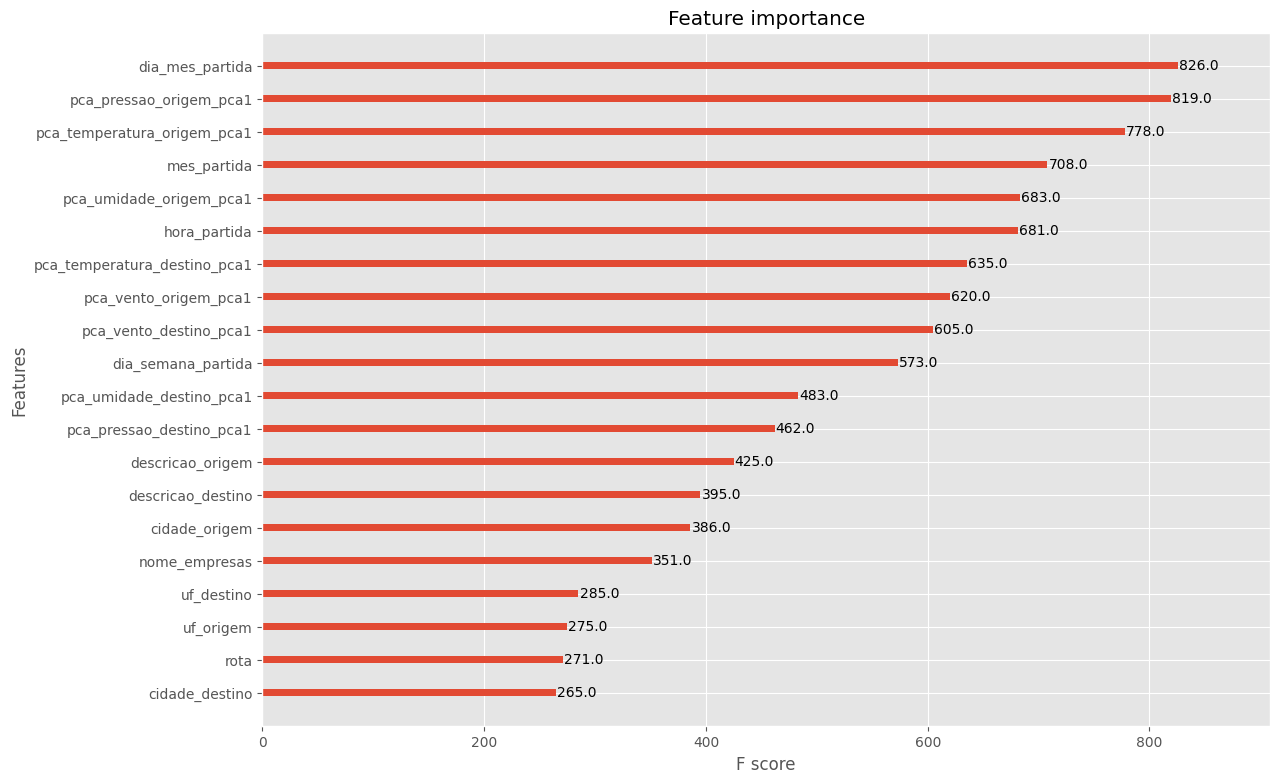

In [39]:
plt.rcParams['figure.figsize'] = [13, 9]
xgb.plot_importance(model_class, max_num_features=20)
plt.show()

#### Treeplot

In [40]:
# plot single tree
#fig, ax = plt.subplots(figsize=(100, 100))
#fig = plt.figure(figsize=(12, 6))
# plt.figure(figsize=(50, 50))
#plot_tree(model_class)
#plt.savefig('xgb_treeplot.jpg', dpi=1800)  
#plt.show()

### Matriz de Confusão

O gráfico de calor mostra as previsões do modelo em relação aos valores reais. Os valores na diagonal (7979 e 148171) representam as previsões corretas para as classes negativas (0) e positivas (1), respectivamente. Os outros dois valores (19805 e 18812) representam os erros do tipo I(falsos negativos) e tipo II(falsos positivos), respectivamente. A matriz sugere que o modelo é melhor em prever a classe majoritária (Pontual) do que a minoritária (Atraso), o que é comum em conjuntos de dados desbalanceados.

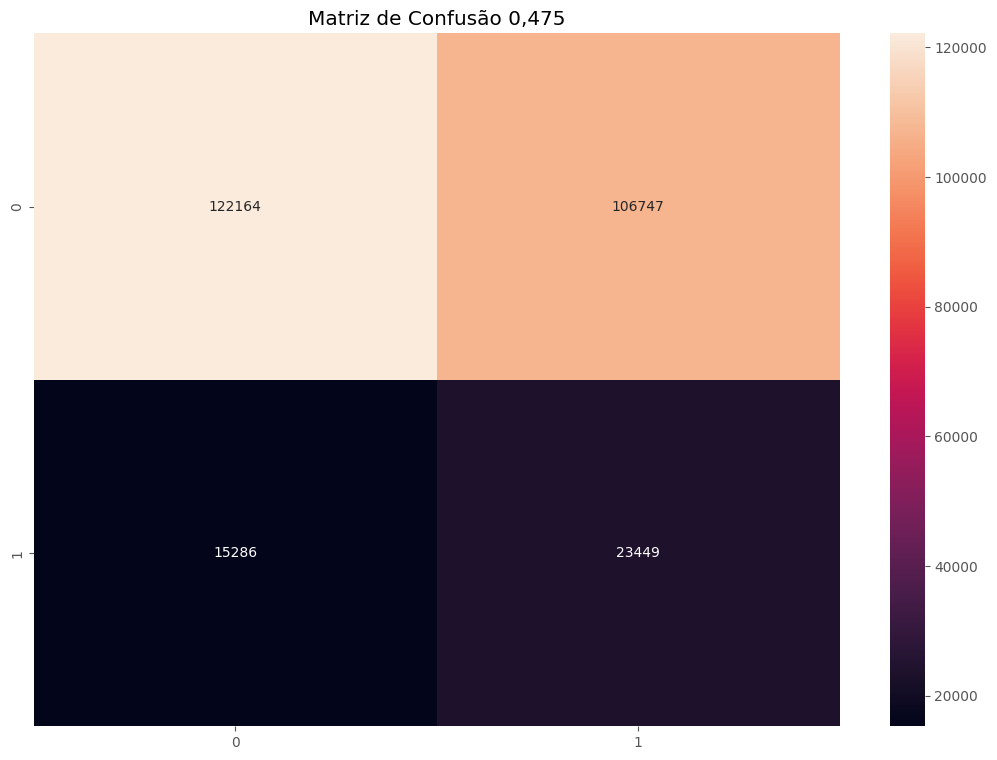

In [41]:
# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Matriz de Confusão 0,475')
plt.show()

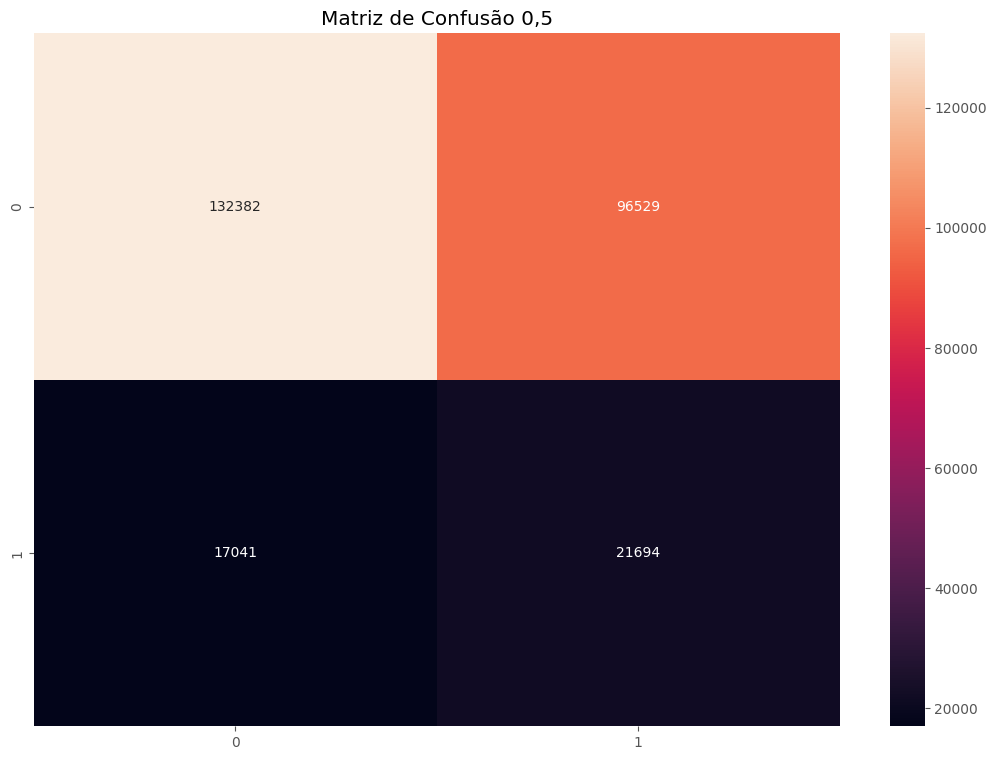

In [42]:
# Garantir que y_test e y_pred_proba sejam arrays NumPy
y_test_np = np.array(y_test)  # Converte y_test para NumPy se necessário
y_pred_proba = model_class.predict(dtest)  # Previsões no formato de probabilidades da classe positiva

# Prever as classes com base no limiar de 0.5
y_pred3 = (y_pred_proba >= 0.5).astype(int)

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred3)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Matriz de Confusão 0,5')
plt.show()

### Curva ROC

A relação entre a taxa de verdadeiro positivo e a taxa de falso positivo para diferentes limiares de classificação. A curva está suave e sobe gradualmente. No entanto, uma curva ROC ideal se aproximaria mais do canto superior esquerdo mais rápido. A consequência é que temos uma alta taxa de verdadeiro positivo e baixa taxa de falso positivo. Isso devido ao banco de dados desbalanceado. O resultado nos permit dizer que ainda há um potencial de melhoria no modelo

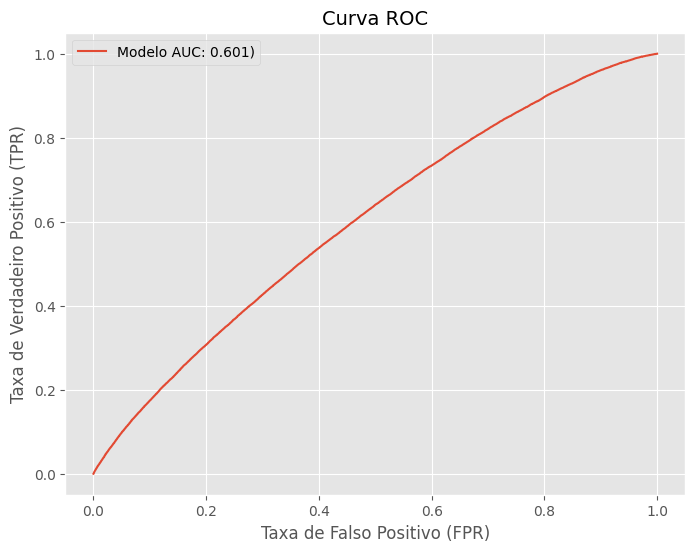

In [43]:
# Gerar previsões probabilísticas para a classe positiva
y_pred_proba_pos = model_class.predict(dtest)   # Probabilidades da classe positiva

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_pos)

# Plot da Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Modelo AUC: {roc_auc_score(y_test_np, y_pred_proba):.3f})')
plt.title('Curva ROC', fontsize=14)
plt.xlabel('Taxa de Falso Positivo (FPR)', fontsize=12)
plt.ylabel('Taxa de Verdadeiro Positivo (TPR)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()




### Curva de Precisão-Recall

Este gráfico é útil em situações de classes desbalanceadas e foca na relação entre precisão (quão muitos dos classificados como positivos são realmente positivos) e recall (quão muitos dos positivos reais foram capturados pelo modelo). A curva começa com uma alta precisão, mas diminui à medida que o recall aumenta, isso pode ser um sinal de que pode estar acontecendo um trade-off, ou seja, visando ter mais ou manter performance.

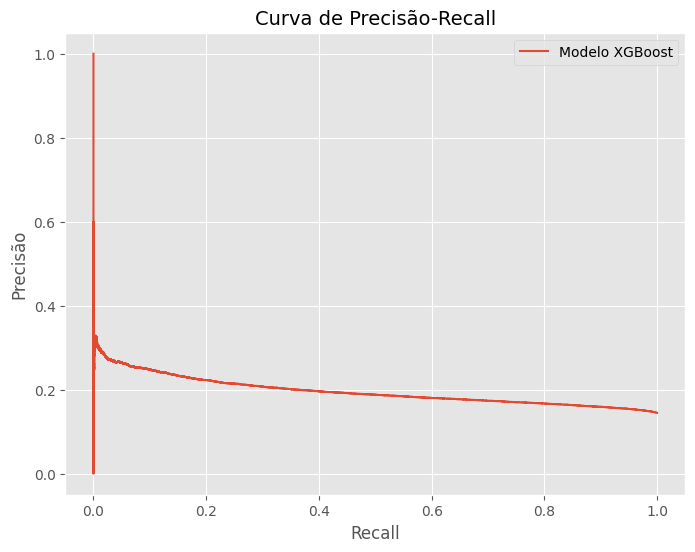

In [44]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Gerar previsões probabilísticas para a classe positiva
y_pred_proba_pos = model_class.predict(dtest)   # Probabilidades da classe positiva

# Curva de Precisão-Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_pos)

# Plot da Curva de Precisão-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Modelo XGBoost')
plt.title('Curva de Precisão-Recall', fontsize=14)
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precisão', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


### Calibration plot

In [ ]:
best_hyperparams =   {'colsample_bylevel': 0.6888636337561227,
                     'colsample_bynode': 0.438483362447578,
                     'colsample_bytree': 0.6629411690049818,
                     'device': 'cuda',
                     'enable_categorical': True,
                     'eval_metric': ('aucpr', 'auc', 'logloss', 'error'),
                     'gamma': 4.910663977197203,
                     'learning_rate': 0.3055797431953079,
                     'max_bin': 136,
                     'max_cat_threshold': 41,
                     'max_cat_to_onehot': 5,
                     'max_delta_step': 14.405084338700766,
                     'max_depth': 24,
                     'max_leaves': 180,
                     'min_child_weight': 25,
                     'n_estimators': 740,
                     'objective': 'binary:logistic',
                     'reg_alpha': 53,
                     'reg_lambda': 11.288867475069004,
                     'sampling_method': 'gradient_based',
                     'scale_pos_weight': 8.056825557894228,
                     'seed': 33,
                     'subsample': 0.9081363202745704,
                     'tree_method': 'hist',
                     'updater': 'grow_gpu_hist',
                     'validate_parameters': True}

In [49]:
# Garantir que y_test e y_pred_proba sejam arrays NumPy
y_test_np = np.array(y_test)  # Converte y_test para NumPy se necessário
y_pred_proba = model_class.predict(dtest)  # Previsões no formato de probabilidades da classe positiva


Before Calibration
--- Uncalibrated ---
Log Loss: 0.6744
AUC: 0.6014
Brier Score: 0.2409
Overconfidence Error: 0.3680
Expected Calibration Error (ECE): 0.3344
Maximum Calibration Error (MCE): 0.9050


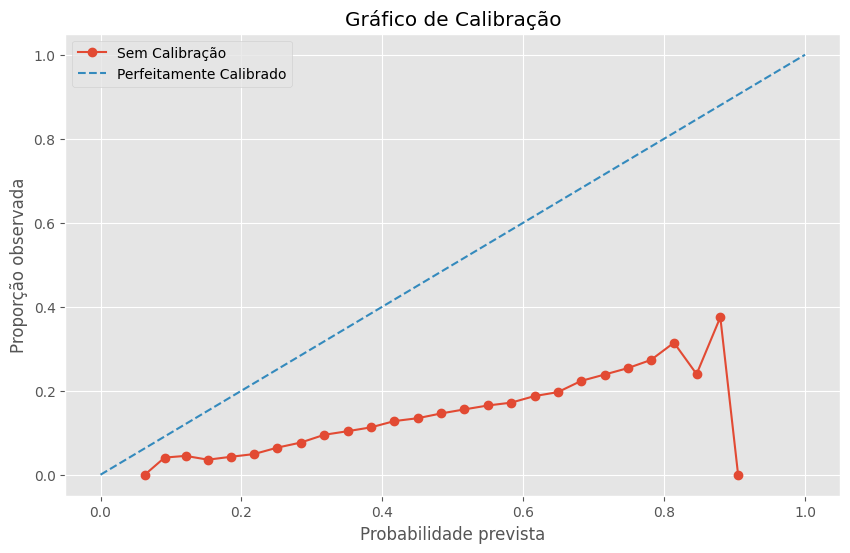

In [55]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss, roc_auc_score, brier_score_loss, make_scorer
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
import numpy as np

# Funções para métricas adicionais
def calculate_overconfidence_error(y_true, y_pred, bins=10):
    """Calcula o erro de overconfidence."""
    bin_edges = np.linspace(0, 1, bins + 1)
    bin_sums = np.zeros(bins)
    bin_counts = np.zeros(bins)

    for i in range(bins):
        bin_mask = (y_pred >= bin_edges[i]) & (y_pred < bin_edges[i + 1])
        bin_sums[i] = np.sum(y_pred[bin_mask]) - np.sum(y_true[bin_mask])
        bin_counts[i] = np.sum(bin_mask)

    overconfidence_error = np.sum(np.abs(bin_sums) / bin_counts) / bins
    return overconfidence_error

def calculate_ece_mce(y_true, y_pred, bins=10):
    """Calcula o Expected Calibration Error (ECE) e Maximum Calibration Error (MCE)."""
    bin_edges = np.linspace(0, 1, bins + 1)
    ece = 0
    mce = 0

    for i in range(bins):
        bin_mask = (y_pred >= bin_edges[i]) & (y_pred < bin_edges[i + 1])
        bin_true = y_true[bin_mask]
        bin_pred = y_pred[bin_mask]

        if len(bin_true) > 0:
            accuracy = np.mean(bin_true)
            avg_confidence = np.mean(bin_pred)
            bin_error = np.abs(accuracy - avg_confidence)

            ece += bin_error * len(bin_true)
            mce = max(mce, bin_error)

    ece /= len(y_true)
    return ece, mce

def evaluate_metrics(y_true, y_pred, title="Metrics"):
    """Calcula e exibe as métricas."""
    logloss = log_loss(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    brier = brier_score_loss(y_true, y_pred)
    overconfidence = calculate_overconfidence_error(y_true, y_pred)
    ece, mce = calculate_ece_mce(y_true, y_pred)

    print(f"--- {title} ---")
    print(f"Log Loss: {logloss:.4f}")
    print(f"AUC: {auc:.4f}")
    print(f"Brier Score: {brier:.4f}")
    print(f"Overconfidence Error: {overconfidence:.4f}")
    print(f"Expected Calibration Error (ECE): {ece:.4f}")
    print(f"Maximum Calibration Error (MCE): {mce:.4f}")

# Prever probabilidades da classe positiva no conjunto de teste
y_pred_test_uncalibrated = model_class.predict(dtest)  # Probabilidades da classe positiva

print("\nBefore Calibration")
evaluate_metrics(y_test, y_pred_test_uncalibrated, title="Uncalibrated")

# Obter os valores para o gráfico de calibração antes e depois da calibração
prob_true_uncalibrated, prob_pred_uncalibrated = calibration_curve(y_test, y_pred_test_uncalibrated, n_bins=30, strategy='uniform')

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(prob_pred_uncalibrated, prob_true_uncalibrated, marker='o', label='Sem Calibração')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfeitamente Calibrado')
plt.xlabel('Probabilidade prevista')
plt.ylabel('Proporção observada')
plt.title('Gráfico de Calibração')
plt.legend()
plt.grid(True)
plt.show()

# Análise do resultado OOT